# Xns11 - Basic writing and modifying of cross sections

In [1]:
from mikeio1d import Xns11
from mikeio1d.cross_sections import CrossSection
from mikeio1d.cross_sections import Marker
import numpy as np
import matplotlib.pyplot as plt

#### Create a custom cross section from raw x, z points.

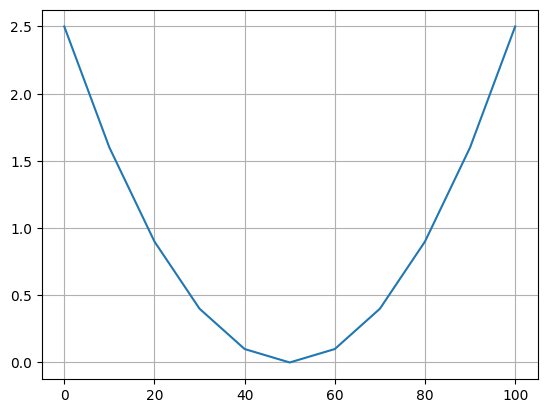

In [2]:
# Create some imaginary cross section data. You can use your own data here.
n_points = 11
x = np.linspace(0, 100, n_points)
z = 10**-3 * (x - 50) ** 2
plt.plot(x, z)
plt.grid(True)
plt.show()

In [3]:
# Create a CrossSection object from the xz data. Every cross section must have a location id, chainage, and topo id.
location_id = "my_reach"
chainage = 100.0
topo_id = "my_topo"

xs = CrossSection.from_xz(x, z, location_id, chainage, topo_id)
xs

<CrossSection: my_reach, 100.000, my_topo>

<Axes: title={'center': 'Cross section'}, xlabel='x [meters]', ylabel='z [meters]'>

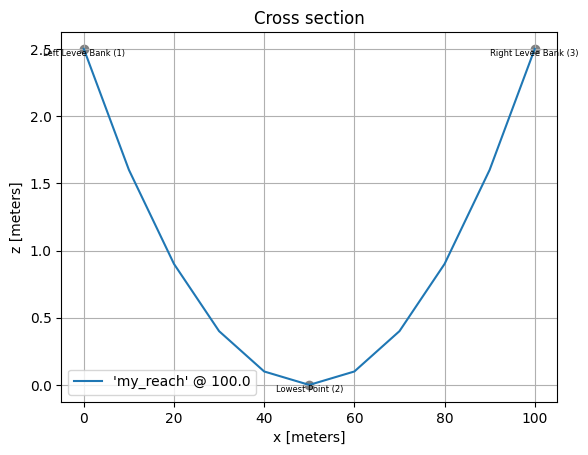

In [4]:
# Plot the cross section to verify that it looks correct.
# Notice that default markers are placed (to disable, use default_markers=False when calling create_from_xz).
xs.plot()

In [5]:
# Explore the raw data of the cross section to verify it looks correct.
xs.raw

,markers,marker_labels,x,z,resistance
0,1,Left Levee Bank (1),0.0,2.5,1.0
1,,,10.0,1.6,1.0
2,,,20.0,0.9,1.0
3,,,30.0,0.4,1.0
4,,,40.0,0.1,1.0
5,2,Lowest Point (2),50.0,0.0,1.0
6,,,60.0,0.1,1.0
7,,,70.0,0.4,1.0
8,,,80.0,0.9,1.0
9,,,90.0,1.6,1.0


In [6]:
# Similarly, look at the processed data.
xs.processed

,level,flow_area,radius,storage_width,additional_storage_area,resistance,conveyance_factor
0,0.0000,0.000000,0.000000,0.0,0.0,1.0,0.000000
1,0.0500,0.250000,0.032000,10.0,0.0,1.0,0.025198
2,0.1000,1.000000,0.064000,20.0,0.0,1.0,0.160000
3,0.1750,2.687500,0.123054,25.0,0.0,1.0,0.664884
4,0.2500,4.750000,0.183588,30.0,0.0,1.0,1.534347
5,0.3250,7.187500,0.242101,35.0,0.0,1.0,2.791957
6,0.4000,10.000000,0.298811,40.0,0.0,1.0,4.469558
7,0.5250,15.312500,0.396141,45.0,0.0,1.0,8.259358
8,0.6500,21.250000,0.495106,50.0,0.0,1.0,13.299162
9,0.7750,27.812500,0.592995,55.0,0.0,1.0,19.630912


#### Create an Xns11 file and add a cross section.

In [7]:
# Create an empty Xns11 object.
xns = Xns11()
xns

<mikeio1d.Xns11 (0)>

In [8]:
# Add a cross section to the Xns11 object.
xns.add(xs)
xns.to_dataframe()

,,,cross_section
location_id,chainage,topo_id,
my_reach,100.000,my_topo,"<CrossSection: my_reach, 100.000, my_topo>"


In [9]:
# Save the Xns11 object to a file.
xns.write("my_xns11.xns11")

<Axes: title={'center': 'Cross section'}, xlabel='x [meters]', ylabel='z [meters]'>

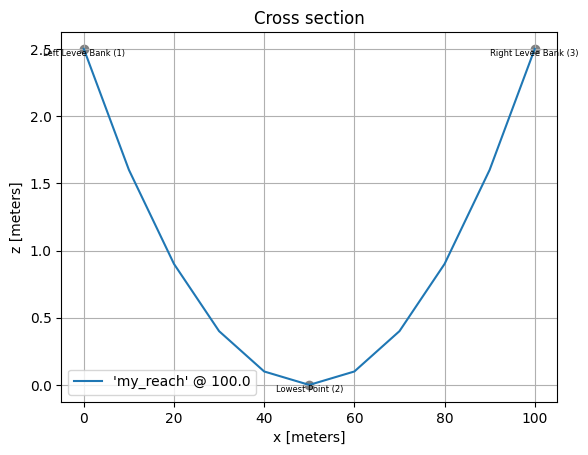

In [10]:
# Open the file and read the cross section from it as a test
xns2 = Xns11("my_xns11.xns11")
xs = xns2.sel(location_id="my_reach", chainage=100, topo_id="my_topo")
xs.plot()

#### Extract a subset of cross sections and save to another xns11 file.

In [11]:
# Open an existing Xns11 file and extract a slice from it
xns = Xns11("../tests/testdata/mikep_cs_demo.xns11")
sections = xns["basin_left1"]
xns_subset = Xns11(sections)
xns_subset.to_dataframe()

cross_section
location_id chainage topo_id                                         
basin_left1 2.004    1          <CrossSection: basin_left1, 2.004, 1>
            33.774   1         <CrossSection: basin_left1, 33.774, 1>
            80.945   1         <CrossSection: basin_left1, 80.945, 1>
            122.042  1        <CrossSection: basin_left1, 122.042, 1>
            166.107  1        <CrossSection: basin_left1, 166.107, 1>
            184.886  1        <CrossSection: basin_left1, 184.886, 1>
            210.212  1        <CrossSection: basin_left1, 210.212, 1>
            264.614  1        <CrossSection: basin_left1, 264.614, 1>
            284.638  1        <CrossSection: basin_left1, 284.638, 1>
            341.152  1        <CrossSection: basin_left1, 341.152, 1>
            413.617  1        <CrossSection: basin_left1, 413.617, 1>
            481.451  1        <CrossSection: basin_left1, 481.451, 1>

In [12]:
# Save the new Xns11 object to a file
xns_subset.write("basin_left1_sections.xns11")

#### Update an existing cross section's raw data.

In [13]:
# Get the current raw data as a DataFrame to use for further processing.
raw_modified = xns["basin_left1", "122.042", "1"].raw
raw_modified

,markers,marker_labels,x,z,resistance
0,,,0.000,6059.508,25.0
1,,,2.062,6059.624,25.0
2,1,Left Levee Bank (1),4.124,6059.754,25.0
3,,,6.186,6059.607,25.0
4,,,14.435,6058.882,25.0
...,...,...,...,...,...
67,,,193.835,6057.961,25.0
68,3,Right Levee Bank (3),195.897,6057.989,25.0
69,,,197.959,6057.969,25.0
70,,,200.021,6057.634,25.0


In [14]:
# Add 1000 to all 'z' elevations.
raw_modified.z += 1000
raw_modified

,markers,marker_labels,x,z,resistance
0,,,0.000,7059.508,25.0
1,,,2.062,7059.624,25.0
2,1,Left Levee Bank (1),4.124,7059.754,25.0
3,,,6.186,7059.607,25.0
4,,,14.435,7058.882,25.0
...,...,...,...,...,...
67,,,193.835,7057.961,25.0
68,3,Right Levee Bank (3),195.897,7057.989,25.0
69,,,197.959,7057.969,25.0
70,,,200.021,7057.634,25.0


In [15]:
# Assign the modified raw data back to the cross section.
xns["basin_left1", "122.042", "1"].raw = raw_modified

In [16]:
# Write the changes to the file, otherwise they will be lost.
xns.write()

In [17]:
# Confirm the raw data was saved.
xns = Xns11("basin_left1_sections.xns11")
xns["basin_left1", "122.042", "1"].raw

,markers,marker_labels,x,z,resistance
0,,,0.000,6059.508,25.0
1,,,2.062,6059.624,25.0
2,1,Left Levee Bank (1),4.124,6059.754,25.0
3,,,6.186,6059.607,25.0
4,,,14.435,6058.882,25.0
...,...,...,...,...,...
67,,,193.835,6057.961,25.0
68,3,Right Levee Bank (3),195.897,6057.989,25.0
69,,,197.959,6057.969,25.0
70,,,200.021,6057.634,25.0


,marker,marker_label,x,z
0,1,Left Levee Bank (1),4.124,6059.754
1,2,Lowest Point (2),72.914,6052.803
2,3,Right Levee Bank (3),195.897,6057.989
3,4,Left Low Flow Bank (4),71.119,6053.263
4,5,Right Low Flow Bank (5),74.003,6053.357


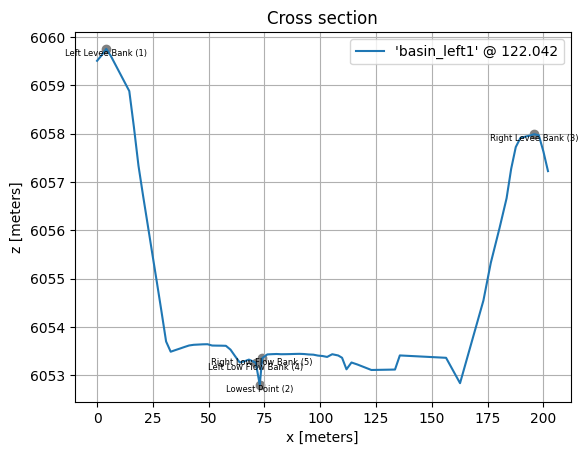

In [18]:
# Update the coordinate markers. Start by getting the current markers.
xns["basin_left1", "122.042", "1"].plot()
df = xns["basin_left1", "122.042", "1"].markers
df

,marker,marker_label,x,z
0,1,Left Levee Bank (1),4.124,6059.754
1,2,Lowest Point (2),72.914,6052.803
2,3,Right Levee Bank (3),195.897,6057.989
3,4,Left Low Flow Bank (4),71.119,6053.263
4,5,Right Low Flow Bank (5),74.003,6053.357


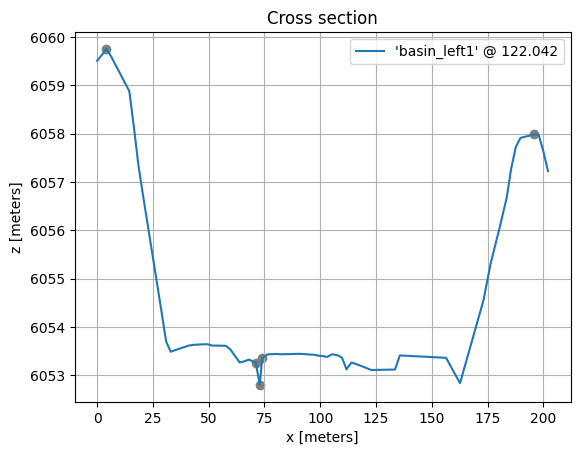

In [19]:
# Set the left and right low flow banks markers, and plot the cross section to verify the changes.
xns["basin_left1", "122.042", "1"].set_marker(Marker.LEFT_LOW_FLOW_BANK, x=70)
xns["basin_left1", "122.042", "1"].set_marker(Marker.RIGHT_LOW_FLOW_BANK, x=74)
xns["basin_left1", "122.042", "1"].plot(with_marker_labels=False)
xns["basin_left1", "122.042", "1"].markers

,marker,marker_label,x,z
0,1,Left Levee Bank (1),4.124,6059.754
1,2,Lowest Point (2),72.914,6052.803
2,3,Right Levee Bank (3),195.897,6057.989
3,4,Left Low Flow Bank (4),71.119,6053.263
4,5,Right Low Flow Bank (5),74.003,6053.357
5,42,User Marker (42),156.408,6053.364


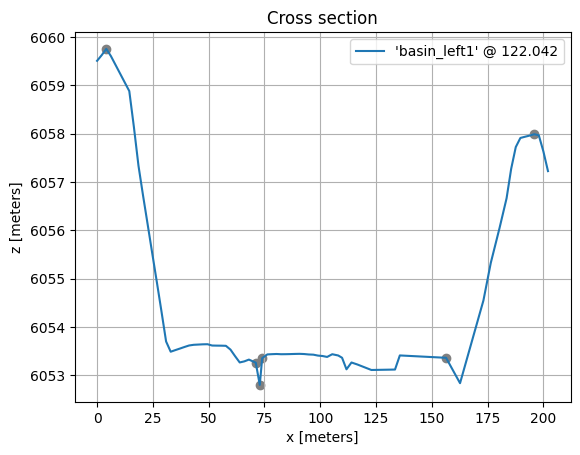

In [20]:
# Add a user defined marker.
xns["basin_left1", "122.042", "1"].set_marker(42, x=150)
xns["basin_left1", "122.042", "1"].plot(with_marker_labels=False)
xns["basin_left1", "122.042", "1"].markers

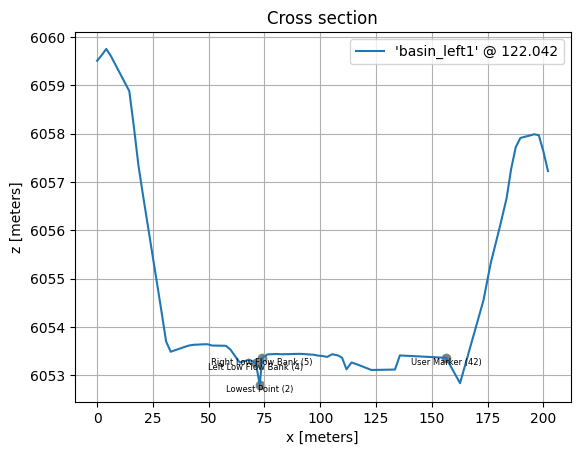

In [21]:
# You can also modify the markers by directly modifying the DataFrame and reassigning it.
df = xns["basin_left1", "122.042", "1"].markers
df = df[~df.marker.isin([Marker.LEFT_LEVEE_BANK.value, Marker.RIGHT_LEVEE_BANK.value])]
xns["basin_left1", "122.042", "1"].markers = df
xns["basin_left1", "122.042", "1"].recompute_processed()
xns["basin_left1", "122.042", "1"].plot();

In [22]:
# Save the changes to the file.
xns.write()

In [23]:
# Similarly, you can update the raw data by reassigning a modified DataFrame.
raw_modified = xns["basin_left1", "122.042", "1"].raw
raw_modified.resistance = 50
xns["basin_left1", "122.042", "1"].raw = raw_modified
xns["basin_left1", "122.042", "1"].raw

,markers,marker_labels,x,z,resistance
0,1,Left Levee Bank (1),0.000,6059.508,50.0
1,,,2.062,6059.624,50.0
2,,,4.124,6059.754,50.0
3,,,6.186,6059.607,50.0
4,,,14.435,6058.882,50.0
...,...,...,...,...,...
67,,,193.835,6057.961,50.0
68,,,195.897,6057.989,50.0
69,,,197.959,6057.969,50.0
70,,,200.021,6057.634,50.0


In [24]:
xns.write()

In [25]:
xns["basin_left1", "122.042", "1"].resistance_distribution

<ResistanceDistribution.UNIFORM: 0>

In [26]:
xns["basin_left1", "122.042", "1"].resistance_distribution = 1
xns["basin_left1", "122.042", "1"].resistance_distribution

<ResistanceDistribution.ZONES: 1>

In [27]:
xns["basin_left1", "122.042", "1"].raw

,markers,marker_labels,x,z,resistance
0,1,Left Levee Bank (1),0.000,6059.508,1.0
1,,,2.062,6059.624,1.0
2,,,4.124,6059.754,1.0
3,,,6.186,6059.607,1.0
4,,,14.435,6058.882,1.0
...,...,...,...,...,...
67,,,193.835,6057.961,1.0
68,,,195.897,6057.989,1.0
69,,,197.959,6057.969,1.0
70,,,200.021,6057.634,1.0


In [28]:
xns["basin_left1", "122.042", "1"].resistance_left_high_flow

1.0

In [29]:
xns["basin_left1", "122.042", "1"].resistance_distribution = 1
xns["basin_left1", "122.042", "1"].raw

,markers,marker_labels,x,z,resistance
0,1,Left Levee Bank (1),0.000,6059.508,1.0
1,,,2.062,6059.624,1.0
2,,,4.124,6059.754,1.0
3,,,6.186,6059.607,1.0
4,,,14.435,6058.882,1.0
...,...,...,...,...,...
67,,,193.835,6057.961,1.0
68,,,195.897,6057.989,1.0
69,,,197.959,6057.969,1.0
70,,,200.021,6057.634,1.0


In [30]:
xns["basin_left1", "122.042", "1"].resistance_left_high_flow

1.0

In [31]:
xns["basin_left1", "122.042", "1"].resistance_left_high_flow = 25
xns["basin_left1", "122.042", "1"].resistance_low_flow = 5
xns["basin_left1", "122.042", "1"].resistance_right_high_flow = 30
xns["basin_left1", "122.042", "1"].raw.iloc[20:70]

,markers,marker_labels,x,z,resistance
20,,,47.428,6053.643,25.0
21,,,49.490,6053.645,25.0
22,,,51.552,6053.618,25.0
23,,,53.614,6053.616,25.0
24,,,55.676,6053.615,25.0
25,,,57.738,6053.612,25.0
26,,,59.800,6053.533,25.0
27,,,61.862,6053.397,25.0
28,,,63.924,6053.268,25.0
29,,,65.986,6053.290,25.0


<Axes: title={'center': 'Cross section'}, xlabel='x [meters]', ylabel='z [meters]'>

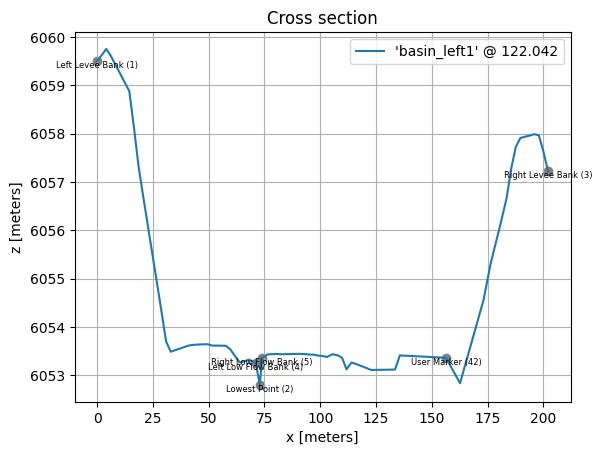

In [32]:
xns["basin_left1", "122.042", "1"].plot()

#### Clean up files we created.

In [33]:
import os

os.remove("my_xns11.xns11")
os.remove("basin_left1_sections.xns11")